# **UAS Visualisasi Data**
# **RAYHAN DWI PRATAMA KUSUMA**
# **41822110034**
# **Sistem Informasi**

In [19]:
import pandas as pd

df = pd.read_csv('police.csv')

summary = df.describe(include='all')
summary_nulls = df.isnull().sum()

summary, summary_nulls


(        state   stop_date stop_time  county_name driver_gender driver_race  \
 count   91741       91741     91741          0.0         86536       86539   
 unique      1        3757      1431          NaN             2           5   
 top        RI  2007-05-16     11:00          NaN             M       White   
 freq    91741          63       358          NaN         62762       61872   
 mean      NaN         NaN       NaN          NaN           NaN         NaN   
 std       NaN         NaN       NaN          NaN           NaN         NaN   
 min       NaN         NaN       NaN          NaN           NaN         NaN   
 25%       NaN         NaN       NaN          NaN           NaN         NaN   
 50%       NaN         NaN       NaN          NaN           NaN         NaN   
 75%       NaN         NaN       NaN          NaN           NaN         NaN   
 max       NaN         NaN       NaN          NaN           NaN         NaN   
 
        violation_raw violation search_conducted  

In [20]:
# Hitung proporsi pelanggaran berdasarkan jenis kelamin
gender_violation_ratio = df.dropna(subset=['driver_gender'])
gender_violation_ratio = (
    gender_violation_ratio['driver_gender']
    .value_counts(normalize=True)
    .rename_axis('driver_gender')
    .reset_index(name='proportion')
)
print(gender_violation_ratio)

  driver_gender  proportion
0             M     0.72527
1             F     0.27473


In [7]:
# Cek nilai unik di kolom driver_gender
print("Nilai unik di kolom driver_gender:", data['driver_gender'].unique())

# Hitung jumlah per jenis kelamin
gender_counts = data['driver_gender'].value_counts()
print("Jumlah per jenis kelamin:")
print(gender_counts)

# Hitung proporsinya
gender_proportion = data['driver_gender'].value_counts(normalize=True)
print("Proporsi per jenis kelamin:")
print(gender_proportion)


Nilai unik di kolom driver_gender: ['M' 'F' nan]
Jumlah per jenis kelamin:
driver_gender
M    36978
F    13315
Name: count, dtype: int64
Proporsi per jenis kelamin:
driver_gender
M    0.735251
F    0.264749
Name: proportion, dtype: float64


In [21]:
df_clean = df.dropna(subset=['driver_gender', 'violation'])

group_counts = df_clean.groupby(['driver_gender', 'violation']).size().reset_index(name='count')

total_per_gender = group_counts.groupby('driver_gender')['count'].transform('sum')

group_counts['proportion'] = group_counts['count'] / total_per_gender
print(group_counts[['driver_gender', 'violation', 'proportion']])

   driver_gender            violation  proportion
0              F            Equipment    0.105199
1              F     Moving violation    0.138218
2              F                Other    0.029738
3              F  Registration/plates    0.044418
4              F            Seat belt    0.024312
5              F             Speeding    0.658114
6              M            Equipment    0.134158
7              M     Moving violation    0.206144
8              M                Other    0.058985
9              M  Registration/plates    0.042175
10             M            Seat belt    0.036296
11             M             Speeding    0.522243


# Grafik 1: Arrest Rate by Time of Day

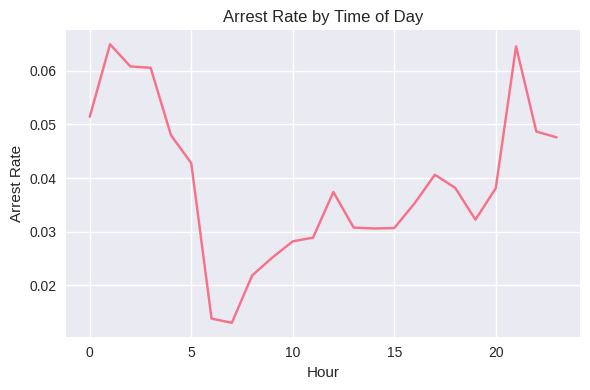

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan format tanggal benar untuk keperluan visualisasi berbasis waktu
df['stop_date'] = pd.to_datetime(df['stop_date'], errors='coerce')


df['hour'] = pd.to_datetime(df['stop_time'], errors='coerce').dt.hour
arrest_rate_by_hour = df.groupby('hour')['is_arrested'].mean()

plt.figure(figsize=(6, 4))
arrest_rate_by_hour.plot()
plt.title('Arrest Rate by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


# Grafik 2: Tren penangkapan narkoba dari waktu ke waktu

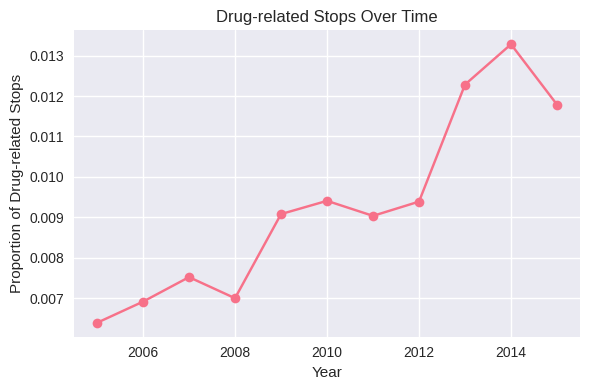

In [23]:

drug_trend = df.groupby(df['stop_date'].dt.year)['drugs_related_stop'].mean()

plt.figure(figsize=(6, 4))
drug_trend.plot(marker='o')
plt.title('Drug-related Stops Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Drug-related Stops')
plt.grid(True)
plt.tight_layout()
plt.show()


# Grafik Pemberhentian Narkoba vs Pemeriksaan Kendaraan per Tahun

<Figure size 800x500 with 0 Axes>

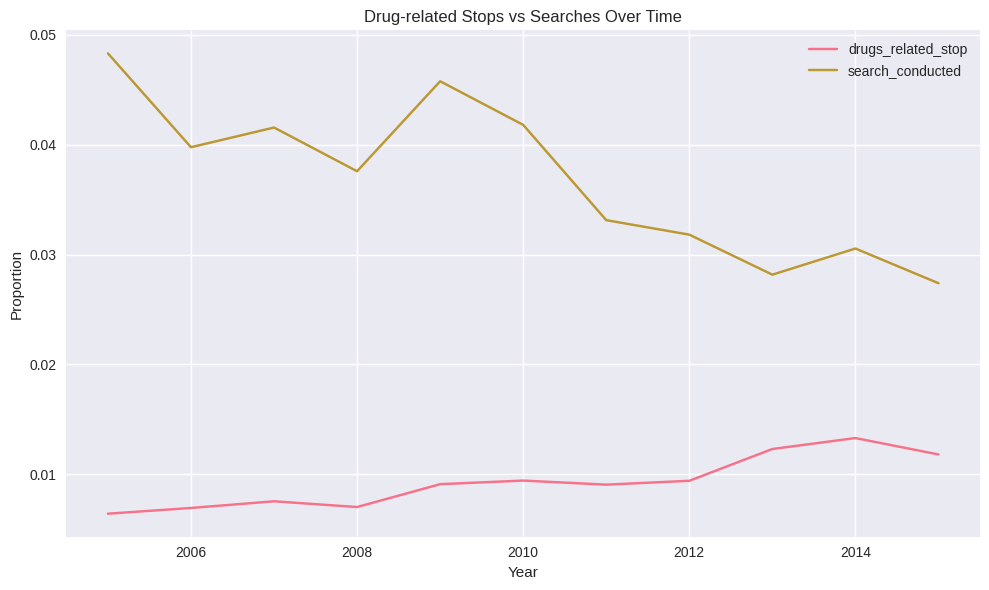

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("police.csv")

# Ubah stop_date menjadi datetime
df['stop_date'] = pd.to_datetime(df['stop_date'], errors='coerce')

# Kelompokkan berdasarkan tahun dan hitung rata-rata proporsi
drug_vs_search = df.groupby(df['stop_date'].dt.year)[['drugs_related_stop', 'search_conducted']].mean()

# Plot
plt.figure(figsize=(8, 5))
drug_vs_search.plot()
plt.title('Drug-related Stops vs Searches Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.grid(True)
plt.tight_layout()
plt.show()


# Grafik 4: Grafik batang pelanggaran berdasarkan distrik

<Figure size 800x500 with 0 Axes>

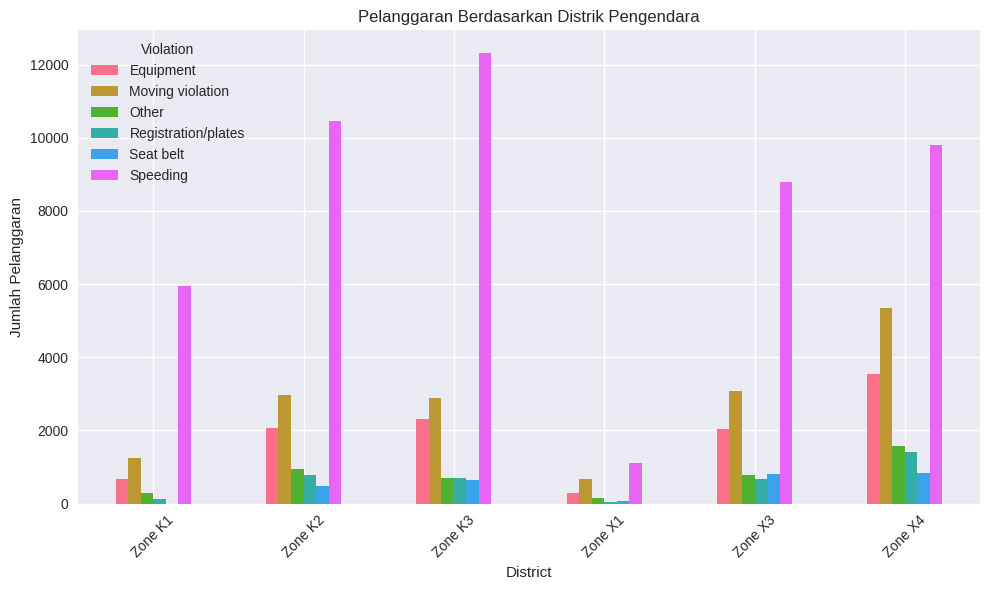

In [25]:


violation_by_district = df.groupby(['district', 'violation']).size().unstack()

plt.figure(figsize=(8, 5))
violation_by_district.plot(kind='bar', stacked=False)
plt.title('Pelanggaran Berdasarkan Distrik Pengendara')
plt.xlabel('District')
plt.ylabel('Jumlah Pelanggaran')
plt.xticks(rotation=45)
plt.legend(title='Violation')
plt.tight_layout()
plt.show()

# Pelanggaran Berdasarkan Jenis Kelamin

<Figure size 1000x600 with 0 Axes>

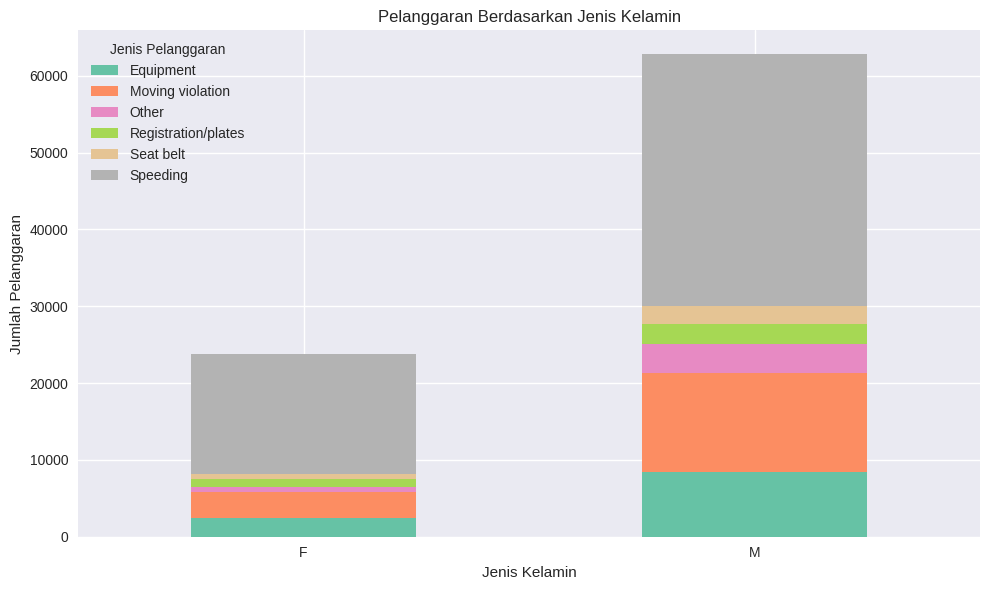

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


violation_by_gender = df_clean.groupby(['driver_gender', 'violation']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(10, 6))
violation_by_gender.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Pelanggaran Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pelanggaran')
plt.xticks(rotation=0)
plt.legend(title='Jenis Pelanggaran')
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("testcpns.csv")



=== Ringkasan Statistik ===
            toefl        ipk  pengalaman_kerja   diterima
count   40.000000  40.000000         40.000000  40.000000
mean   654.000000   2.694500          3.425000   0.475000
std     61.427464   0.653899          1.737778   0.505736
min    540.000000   1.070000          1.000000   0.000000
25%    607.500000   2.070000          2.000000   0.000000
50%    660.000000   3.030000          4.000000   0.000000
75%    690.000000   3.070000          5.000000   1.000000
max    780.000000   4.000000          6.000000   1.000000


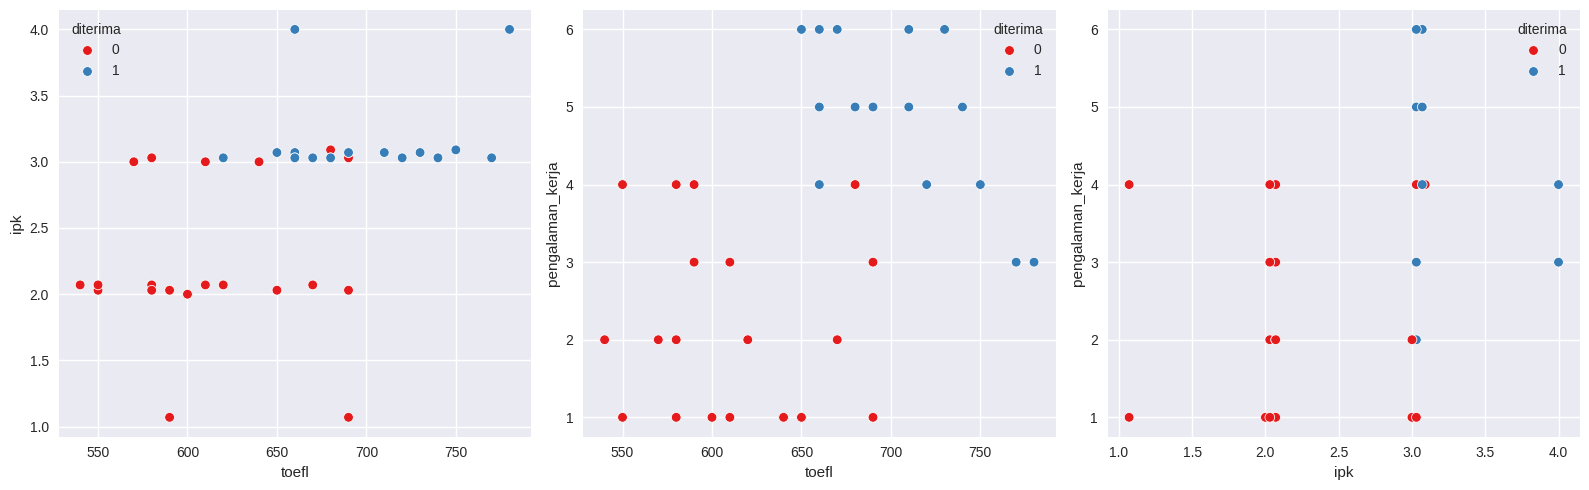

In [28]:
# Ringkasan statistik
print("=== Ringkasan Statistik ===")
print(df.describe())

# Scatter plot antar fitur berwarna berdasarkan label
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='toefl', y='ipk', hue='diterima', palette='Set1')
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='toefl', y='pengalaman_kerja', hue='diterima', palette='Set1')
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='ipk', y='pengalaman_kerja', hue='diterima', palette='Set1')
plt.tight_layout()
plt.show()

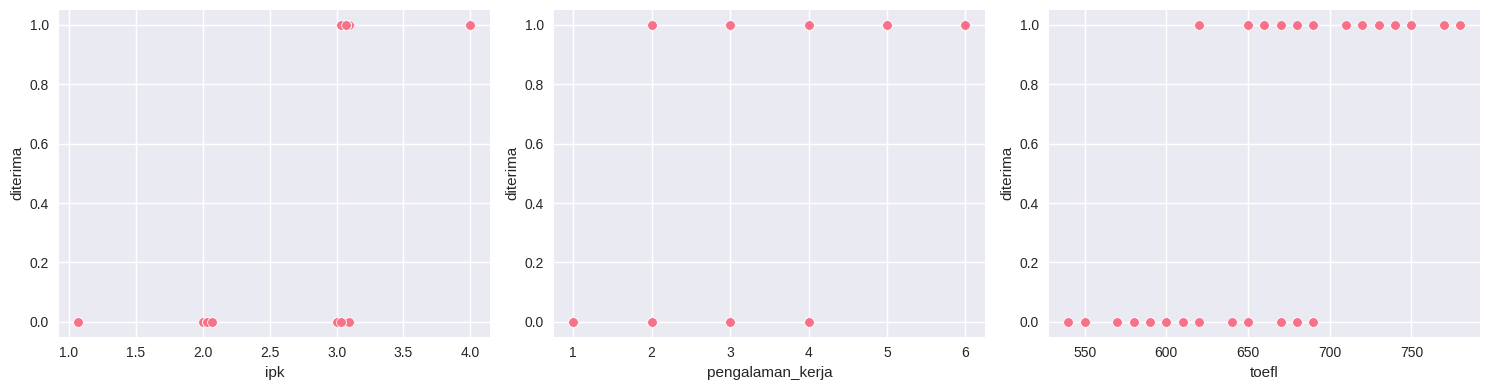

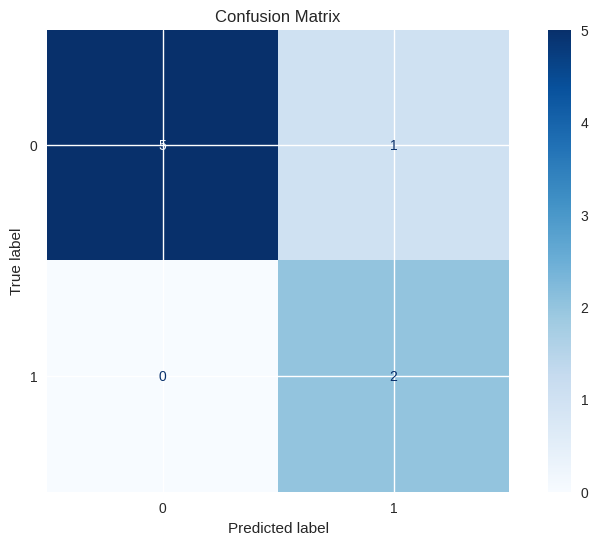

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(data=df, x='ipk', y='diterima', ax=axes[0])
sns.scatterplot(data=df, x='pengalaman_kerja', y='diterima', ax=axes[1])
sns.scatterplot(data=df, x='toefl', y='diterima', ax=axes[2])
plt.tight_layout()
plt.show()

# Model Logistic Regression dan confusion matrix
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [30]:
test_result = X_test.copy()
test_result["actual"] = y_test.values
test_result["predicted"] = y_pred
print("\n=== Hasil Prediksi Testing ===")
print(test_result)

#Prediksi pelamar baru
new_applicants = pd.DataFrame({
    'toefl': [590, 740, 680, 610, 710],
    'ipk': [2.03, 3.07, 3.03, 2.03, 3.00],
    'pengalaman_kerja': [3, 4, 6, 2, 5]
})
new_pred = model.predict(new_applicants)
new_applicants["prediksi_diterima"] = new_pred

print("\n=== Prediksi Pelamar Baru ===")
print(new_applicants)


=== Hasil Prediksi Testing ===
    toefl   ipk  pengalaman_kerja  actual  predicted
19    590  2.03                 3       0          0
16    580  2.07                 4       0          0
15    610  3.00                 1       0          0
26    660  3.07                 4       1          1
4     680  3.09                 4       0          1
12    710  3.07                 6       1          1
37    580  3.03                 1       0          0
27    580  2.03                 2       0          0

=== Prediksi Pelamar Baru ===
   toefl   ipk  pengalaman_kerja  prediksi_diterima
0    590  2.03                 3                  0
1    740  3.07                 4                  1
2    680  3.03                 6                  1
3    610  2.03                 2                  0
4    710  3.00                 5                  1
